In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

animal_data_complete = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])
df = animal_data_complete

df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


# Tumor Response to Treatment

In [26]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

df_tumor_data = df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
tumor_response = df_tumor_data.groupby(["Drug", "Timepoint"])

In [5]:
mean_tumor_volume = pd.DataFrame(tumor_response["Tumor Volume (mm3)"].mean())
#pd.set_option('display.max_rows', None)
mean_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [27]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

standard_error_of_tumor_volumes = pd.DataFrame(tumor_response["Tumor Volume (mm3)"].sem())
#pd.set_option('display.max_rows', None)
standard_error_of_tumor_volumes.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [28]:
# Minor Data Munging to Re-Format the Data Frames

mean_tumor_volume_format = mean_tumor_volume.reset_index()
mean_tumor_volume_format_df = mean_tumor_volume_format.pivot_table(values = "Tumor Volume (mm3)", index = "Timepoint", columns = "Drug")
mean_tumor_volume_format_df 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [29]:
# Minor Data Munging to Re-Format the Data Frames

standard_error_of_tumor_volumes_format = standard_error_of_tumor_volumes.reset_index()
standard_error_of_tumor_volumes_df = standard_error_of_tumor_volumes_format.pivot_table(values = "Tumor Volume (mm3)", index = "Timepoint", columns = "Drug")
standard_error_of_tumor_volumes_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


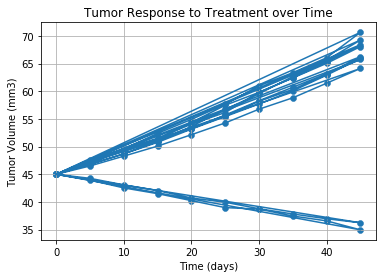

In [9]:
# Generate the Plot (with Error Bars)

x_axis_tumor = mean_tumor_volume_format["Timepoint"]
y_axis_tumor = mean_tumor_volume_format["Tumor Volume (mm3)"]
plt.title("Tumor Response to Treatment over Time")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(x_axis_tumor, y_axis_tumor, linewidths = 0.5)
plt.errorbar(x_axis_tumor, y_axis_tumor)
plt.grid(True)

#plt.legend()
plt.savefig("tumor_volume_plot.png")
plt.show()



# Metastatic Response to Treatment

In [30]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

df_metastatic_data = df[["Drug", "Timepoint", "Metastatic Sites"]]
metastatic_data = df_metastatic_data.groupby(["Drug", "Timepoint"])

In [11]:
mean_met_site_data = pd.DataFrame(metastatic_data["Metastatic Sites"].mean())
#pd.set_option('display.max_rows', None)
mean_met_site_data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [31]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint

standard_error_of_met_site = pd.DataFrame(metastatic_data["Metastatic Sites"].sem())
#pd.set_option('display.max_rows', None)
standard_error_of_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [32]:
# Minor Data Munging to Re-Format the Data Frames

mean_met_site_data_format = mean_met_site_data.reset_index()
mean_met_site_data_format_df = mean_met_site_data_format.pivot_table(values = "Metastatic Sites", index = "Timepoint", columns = "Drug")
mean_met_site_data_format_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [14]:
# Minor Data Munging to Re-Format the Data Frames

standard_error_of_met_site_format = standard_error_of_met_site.reset_index()
standard_error_of_met_site_df = standard_error_of_met_site_format.pivot_table(values = "Metastatic Sites", index = "Timepoint", columns = "Drug")
standard_error_of_met_site_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


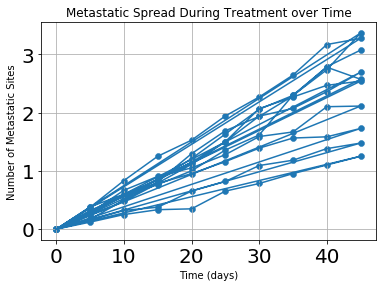

In [33]:
# Generate the Plot (with Error Bars)

x_axis_metsite = mean_met_site_data_format["Timepoint"]
y_axis_metsite =  mean_met_site_data_format["Metastatic Sites"]
plt.title("Metastatic Spread During Treatment over Time")
plt.xlabel("Time (days)")
plt.ylabel("Number of Metastatic Sites")

plt.scatter(x_axis_metsite, y_axis_metsite, linewidths = 0.5)
plt.errorbar(x_axis_metsite, y_axis_metsite)
plt.grid(True)

#plt.legend()
plt.savefig("metastatic_sites_plot.png")
plt.show()

# Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

df_mouse_data = df[["Drug", "Timepoint", "Mouse ID"]]
mouse_data = df_mouse_data.groupby(["Drug", "Timepoint"])

In [17]:
count_of_mice = pd.DataFrame(mouse_data["Mouse ID"].count())
#pd.set_option('display.max_rows', None)
count_of_mice.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [18]:
# Minor Data Munging to Re-Format the Data Frames

count_of_mice_format = count_of_mice.reset_index()
count_of_mice_format_df = count_of_mice.pivot_table(values = "Mouse ID", index = "Timepoint", columns = "Drug")
count_of_mice_format_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


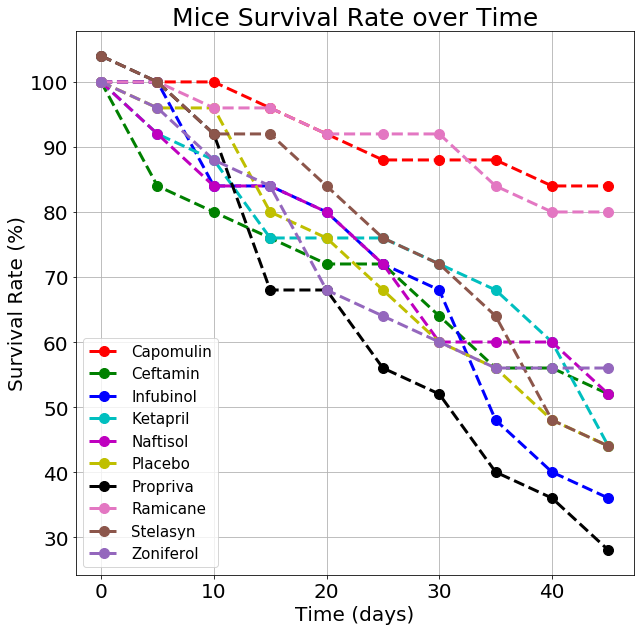

In [25]:
# Generate the Plot (Accounting for percentages)

plt.plot(100 * count_of_mice_format_df["Capomulin"] / 25, "ro", linestyle="dashed", markersize=10, linewidth=3, label = "Capomulin")
plt.plot(100 * count_of_mice_format_df["Ceftamin"] / 25, "go", linestyle="dashed", markersize=10, linewidth=3, label = "Ceftamin")
plt.plot(100 * count_of_mice_format_df["Infubinol"] / 25, "bo", linestyle="dashed", markersize=10, linewidth=3, label = "Infubinol")
plt.plot(100 * count_of_mice_format_df["Ketapril"] / 25, "co", linestyle="dashed", markersize=10, linewidth=3, label = "Ketapril")
plt.plot(100 * count_of_mice_format_df["Naftisol"] / 25, "mo", linestyle="dashed", markersize=10, linewidth=3, label = "Naftisol")
plt.plot(100 * count_of_mice_format_df["Placebo"] / 25, "yo", linestyle="dashed", markersize=10, linewidth=3, label = "Placebo")
plt.plot(100 * count_of_mice_format_df["Propriva"] / 25, "ko", linestyle="dashed", markersize=10, linewidth=3, label = "Propriva")
plt.plot(100 * count_of_mice_format_df["Ramicane"] / 25, "tab:pink", marker="o", linestyle="dashed", markersize=10, linewidth=3, label = "Ramicane")
plt.plot(100 * count_of_mice_format_df["Stelasyn"] / 25, "tab:brown", marker="o", linestyle="dashed", markersize=10, linewidth=3, label = "Stelasyn")
plt.plot(100 * count_of_mice_format_df["Zoniferol"] / 25, "tab:purple", marker="o", linestyle="dashed", markersize=10, linewidth=3, label = "Zoniferol")



# x_axis_mousecount = count_of_mice_format["Timepoint"]
# y_axis_mousecount =  count_of_mice_format["Mouse ID"]
plt.title("Mice Survival Rate over Time", fontsize=25)
plt.xlabel("Time (days)", fontsize = 20)
plt.ylabel("Survival Rate (%)", fontsize = 20)




# plt.scatter(x_axis_mousecount, y_axis_mousecount, linewidths = 0.5)
# plt.errorbar(x_axis_mousecount, y_axis_mousecount)
plt.grid(True)
plt.legend(fontsize=15, fancybox=True)
plt.gcf().set_size_inches((10, 10))

#plt.legend()
plt.savefig("survival_rate_plot.png")
plt.show()

# Summary Bar Graph

In [21]:
 #Increase ÷ Original Number × 100